In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
diretos = pd.read_csv(r'../mock_data/diretos/data_df.csv')

In [18]:
indiretos = pd.read_csv(r'../mock_data/indiretos/data_df.csv')

In [19]:
complete = pd.read_csv(r'../mock_data/complete_dataset/data_df.csv')

In [13]:
diretos.head()

,Unnamed: 0,DatadoDocumento,Fornecedor,RazãoSocial,TpImposto,UF,Filial,NºDocumentoSAP-Nota,Material,Descriçãodomaterial,...,UFUnd,Item do pedido,OrgC,Lib,GCm,_UNSEEN_CLASS,_TRUE_LABEL_PROBA,_CLASS_PREDS,_CLASS_PROBA,_GOT_RIGHT
0,33,02/01/2019,303151.0,INGREDION BRASIL INGREDIENTES,B1,PR,BR22,NaN,50007747.0,XAROPE ALTA MALTOSE;82%;;,...,RS,10.0,BR00,NaN,B01,False,NaN,I7,0.998775,True
1,42,02/01/2019,303166.0,INGREDION BRASIL INGREDIENTES,B1,PE,BR04,NaN,50007747.0,XAROPE ALTA MALTOSE;82%;;,...,BA,10.0,BR00,NaN,B02,False,NaN,I7,0.999979,True
2,43,02/01/2019,303118.0,INGREDION BRASIL INGREDIENTES,B1,SP,BR16,NaN,50007747.0,XAROPE ALTA MALTOSE;82%;;,...,SP,10.0,BR00,NaN,B02,False,NaN,I7,0.999984,True
3,47,02/01/2019,303118.0,INGREDION BRASIL INGREDIENTES,B1,SP,BR29,NaN,50007747.0,XAROPE ALTA MALTOSE;82%;;,...,MG,10.0,BR00,NaN,B01,False,NaN,I7,0.999297,True
4,87,02/01/2019,393520.0,PLASTEK DO BRASIL INDUSTRIA E,B1,SP,BR23,NaN,50012784.0,TAMPA PLAST.;.;;;GATORADE PET500;,...,SP,10.0,BR00,NaN,B02,False,NaN,I9,0.999958,True


In [14]:
diretos.columns

Index(['Unnamed: 0', 'DatadoDocumento', 'Fornecedor', 'RazãoSocial',
       'TpImposto', 'UF', 'Filial', 'NºDocumentoSAP-Nota', 'Material',
       'Descriçãodomaterial', 'Nºdopedido', 'Contrato', 'IVAMIRO', 'IVAPC',
       'Status', 'PEP', 'UFUnd', 'Item do pedido', 'OrgC', 'Lib', 'GCm',
       '_UNSEEN_CLASS', '_TRUE_LABEL_PROBA', '_CLASS_PREDS', '_CLASS_PROBA',
       '_GOT_RIGHT'],
      dtype='object')

In [29]:
metrics = pd.DataFrame([diretos.groupby(by='IVAMIRO').mean()['_GOT_RIGHT'], indiretos.groupby(by='IVAMIRO').mean()['_GOT_RIGHT'], complete.groupby(by='IVAMIRO').mean()['_GOT_RIGHT']])
metrics.reset_index(drop=True, inplace=True)

In [33]:
metrics.rename(index={0:'diretos', 1:'indiretos', 2:'complete'}, inplace=True)

In [57]:
metrics

,C0,C1,C7,C8,C9,CD,D5,D6,I0,I1,...,ZB,ZC,ZH,ZT,ZV,CF,IH,IJ,Q7,ZD
diretos,1.000000,0.959184,0.000000,0.921053,0.000000,0.995475,0.000000,0.000000,0.967105,0.960573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
indiretos,0.840000,0.910436,0.842615,0.836555,0.714286,0.907529,0.997284,0.285714,0.518333,0.695652,...,0.835165,0.375,0.0,0.200000,1.000000,NaN,NaN,NaN,NaN,NaN
complete,0.845029,0.895343,0.861386,0.882603,1.000000,0.922994,0.994473,0.052632,0.593548,0.868557,...,0.877285,0.000,0.5,0.428571,0.833333,0.0,0.5,0.0,0.0,0.5


In [64]:
metrics.iloc[2,:].median()

0.8753623188405797

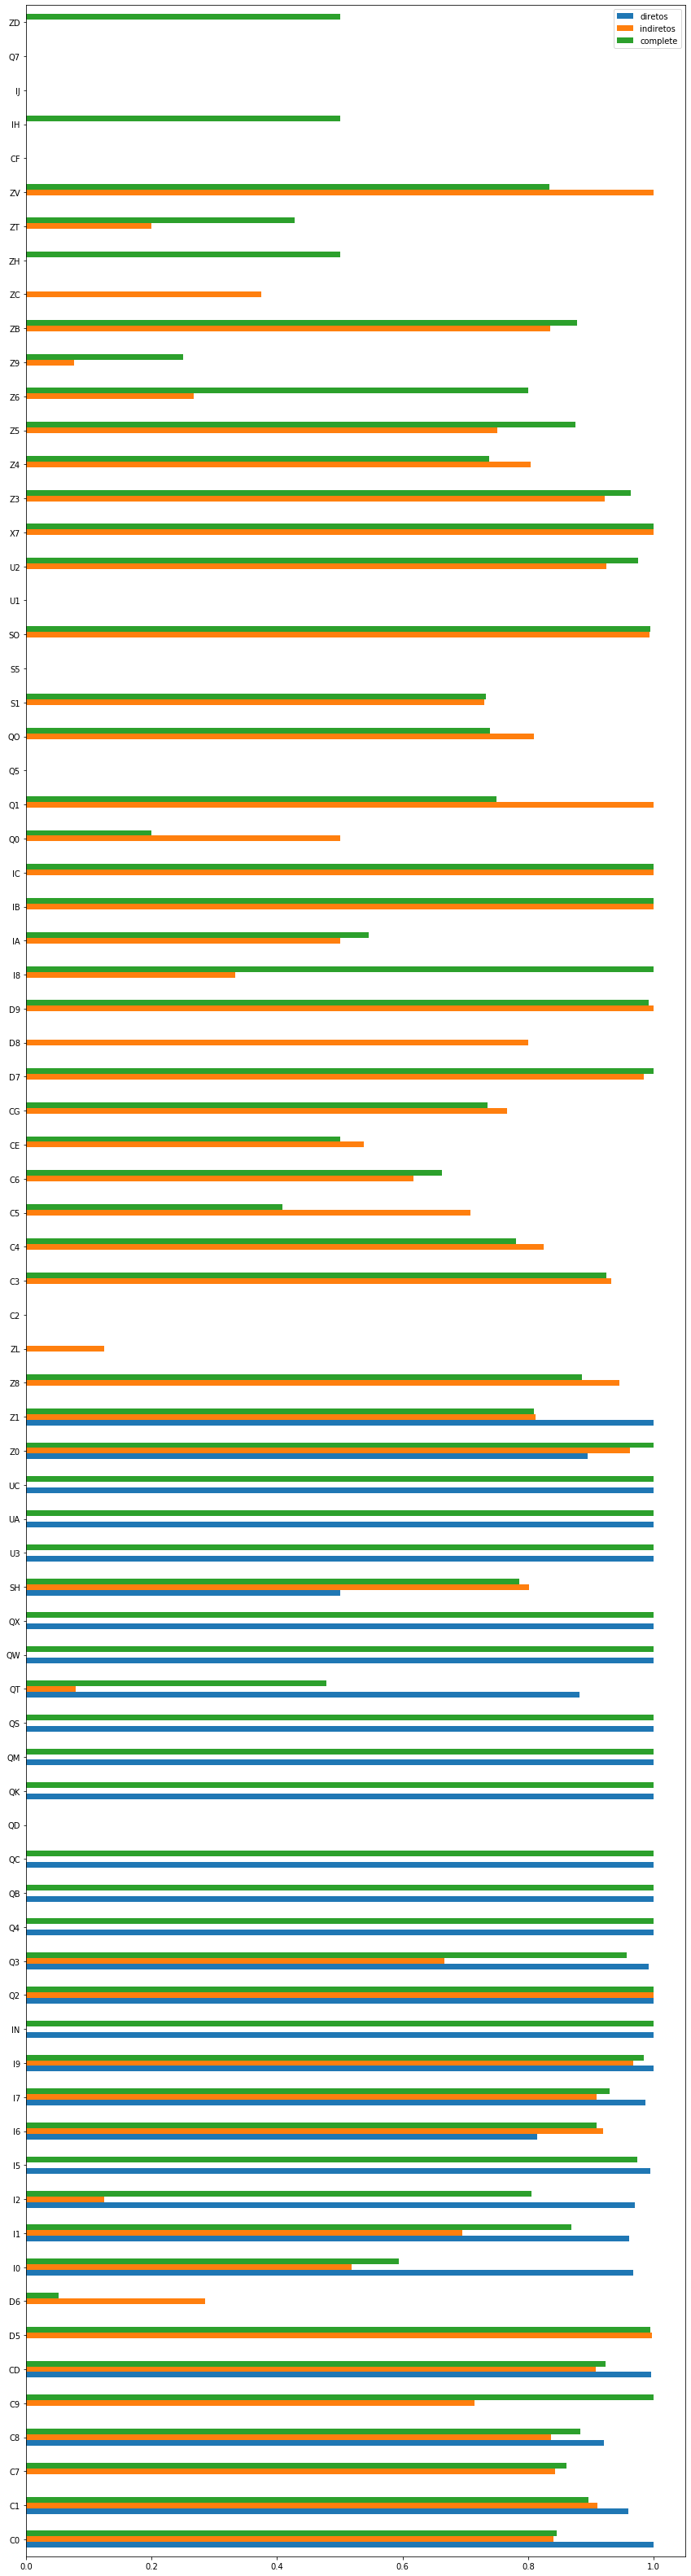

In [49]:
figure = metrics.T.plot.barh()
plt.subplots_adjust(bottom=-10, right=2)

In [53]:
metrics.T.mean()

diretos      0.773240
indiretos    0.661640
complete     0.721126
dtype: float64

In [56]:
metrics[metrics>0].T.mean()

diretos      0.959884
indiretos    0.726506
complete     0.822534
dtype: float64